# SVM

SVM separates data points using the optimal hyperplane with the largest amount of margin. 

In [44]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

In [45]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,8)})

In [46]:
df = pd.read_csv('../features_30_sec.csv')

In [47]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [48]:
#df_ten = df.sample(frac = 0.1)
#df_ten.shape

In [49]:
# target is df[label]
labels = df['label']

# want to consider most other variables for classification
features_df = df.drop(['filename','length','label'], axis=1)
features_df.head()

label_map = {np.unique(labels)[i]:i for i in range(10)}
labels_series = labels.map(lambda i: label_map[i])

In [50]:
from sklearn.preprocessing import StandardScaler
features_scaled_nparray = StandardScaler().fit_transform(features_df)
features_scaled_df = pd.DataFrame(features_scaled_nparray)
features_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,-0.661934,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,0.795823,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,-0.744406,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,-0.246530,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,-0.190517,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


In [51]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, 
                                                    labels, 
                                                    test_size=0.3,
                                                    random_state=109) # 70% training and 30% test

In [52]:
print(X_train.shape)
print(X_test.shape)

(700, 57)
(300, 57)


In [53]:
#Import svm model
from sklearn import svm

#progress bar
from tqdm import tqdm

In [54]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # RBF Kernel

In [55]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [56]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6966666666666667


In [58]:
cm = confusion_matrix(y_test, y_pred)

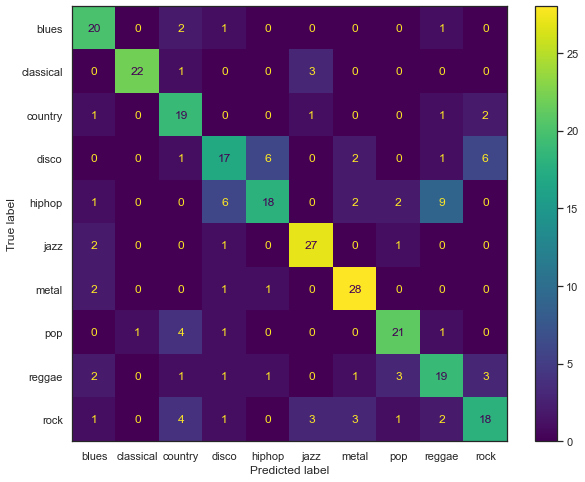

In [59]:
plot_confusion_matrix(clf, X_test, y_test)

In [61]:
cm = confusion_matrix(y_test, y_pred)

       label  accuracy
1  classical  0.956522
5       jazz  0.794118
6      metal  0.777778
7        pop  0.750000
4     hiphop  0.692308
0      blues  0.689655
9       rock  0.620690
2    country  0.593750
3      disco  0.586207
8     reggae  0.558824


<BarContainer object of 10 artists>

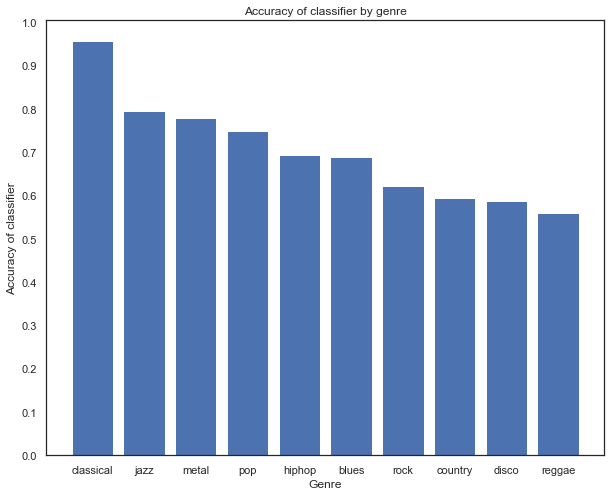

In [62]:
diag_entries = [cm[i,i] for i in range(len(cm))]
class_accuracy = diag_entries / np.sum(cm, axis=0)
label_names = list(label_map.keys())

acc_df = pd.DataFrame({'label':label_names, 'accuracy':class_accuracy})
acc_df = acc_df.sort_values(by='accuracy', ascending=False)
print(acc_df)

plt.xlabel('Genre')
plt.ylabel('Accuracy of classifier')

plt.yticks(np.arange(0,1.05,step=0.1))

plt.title('Accuracy of classifier by genre')
plt.bar(acc_df['label'], acc_df['accuracy'])